This tutorial notebook takes you through the process of loading an Elf Owl model using PICASO and then changing the chemical abundance of certain gases within an Elf Owl model and generating new spectrum using this changed chemistry. Please note that this essentially means that you are loosing the self-consistency of your model in this process. If you are not sure if it is "safe" to manipulate a certain gas abundance within the Elf Owl grid, please contact the Sagnick Mukherjee at samukher@ucsc.edu.

In [3]:
import numpy as np
import os
os.environ['PYSYN_CDBS'] = '/Users/bseamons/Documents/Research/SONORA/picaso/reference/'
import picaso.justdoit as jdi
import matplotlib.pyplot as plt
import xarray

ImportError: cannot import name 'trapz' from 'scipy.integrate' (/opt/miniconda3/envs/picaso/lib/python3.12/site-packages/scipy-1.14.0-py3.12-macosx-10.15-x86_64.egg/scipy/integrate/__init__.py)

In [2]:
teff= '450.0' #K
grav='31.0' # m/s/s
mh='-1.0'
co='0.5' # relative to solar
logkzz='9.0'

ds = xarray.load_dataset(f'/Users/sagnickmukherjee/Downloads/output_425.0_475.0/spectra_logzz_{logkzz}_teff_{teff}_grav_{grav}_mh_{mh}_co_{co}.nc')

NameError: name 'xarray' is not defined

Inspect the contents of the Elf Owl model Xarray file

In [18]:
ds

<xarray.Dataset>
Dimensions:      (wavelength: 193132, pressure: 91)
Coordinates:
  * wavelength   (wavelength) float64 15.0 15.0 15.0 15.0 ... 0.6 0.6 0.6 0.6
  * pressure     (pressure) float64 0.0001778 0.0002108 ... 668.0 791.9
Data variables: (12/40)
    flux         (wavelength) float64 3.827e+08 3.806e+08 ... 7.606e+03
    temperature  (pressure) float64 101.9 103.2 104.8 ... 2.997e+03 3.111e+03
    e-           (pressure) float64 4.5e-38 4.5e-38 ... 1.737e-08 2.236e-08
    H2           (pressure) float64 0.8377 0.8377 0.8377 ... 0.8322 0.8307
    H            (pressure) float64 4.5e-38 4.5e-38 ... 0.005537 0.007109
    H+           (pressure) float64 4.5e-38 4.5e-38 ... 1.069e-18 6.708e-18
    ...           ...
    OCS          (pressure) float64 4.5e-38 4.5e-38 ... 8.072e-13 7.991e-13
    Li           (pressure) float64 4.5e-38 4.5e-38 ... 2.044e-10 1.995e-10
    LiOH         (pressure) float64 4.5e-38 4.5e-38 ... 1.938e-12 1.711e-12
    LiH          (pressure) float64 4.5e-38 4.5e-38 ... 1.46e-10 1.506e-10
    LiCl         (pressure) float64 4.5e-38 4.5e-38 ... 2.163e-14 1.567e-14
    LiF          (pressure) float64 4.5e-38 4.5e-38 ... 8.85e-16 6.762e-16
Attributes:
    author:         Batalha,Mukherjee
    contact:        natasha.e.batalha@nasa.gov
    code:           {"spectra": "PICASO", "chemistry": "visccher"}
    doi:            ELF OWL Paper
    planet_params:  {"logg": {"value": 31.0, "unit": "m / s2"}, "teff": {"val...

Let's plot up the T(P) profile and the abundances of the Elf Owl Model first

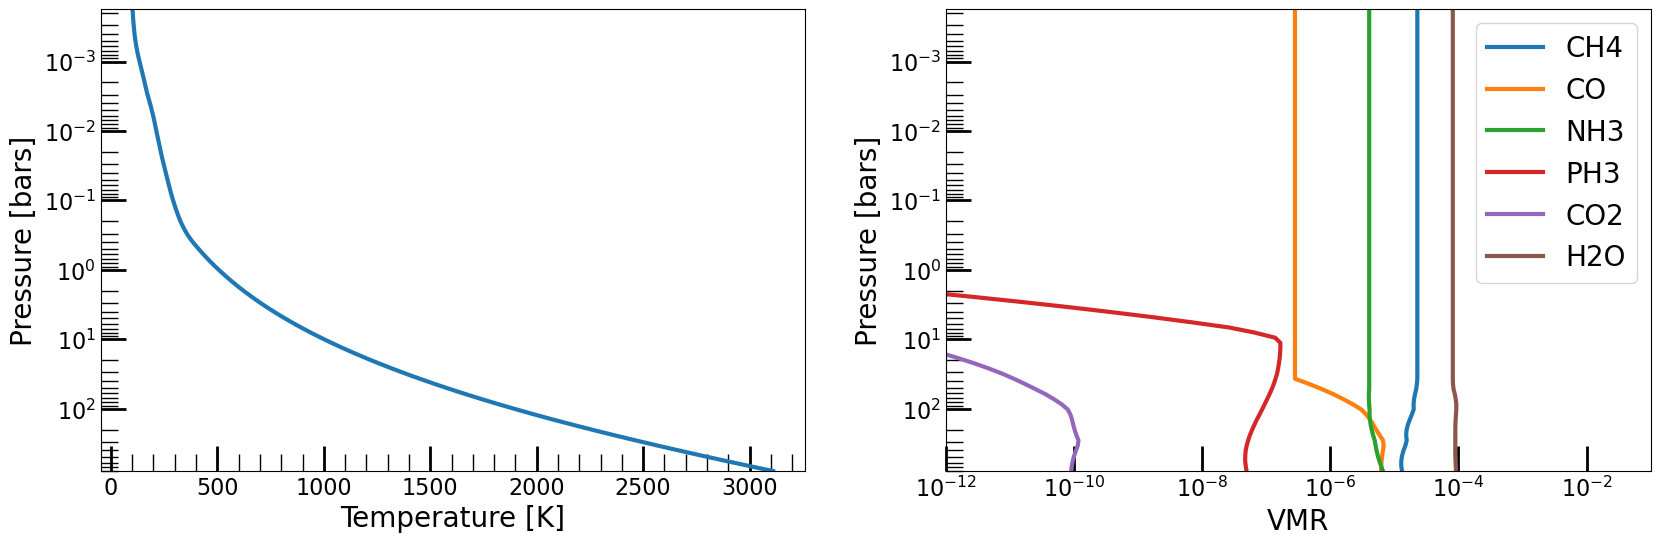

In [19]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(20,6))

ax[0].set_ylim(800,1.77e-4)
ax[0].semilogy(ds['temperature'],ds['pressure'],linewidth=3)
ax[0].set_ylabel("Pressure [bars]",fontsize=20)
ax[0].set_xlabel("Temperature [K]",fontsize=20)

ax[1].set_ylim(800,1.77e-4)
ax[1].set_xlim(1e-12,1e-1)
ax[1].loglog(ds['CH4'],ds['pressure'],label="CH4",linewidth=3)
ax[1].loglog(ds['CO'],ds['pressure'],label="CO",linewidth=3)
ax[1].loglog(ds['NH3'],ds['pressure'],label="NH3",linewidth=3)
ax[1].loglog(ds['PH3'],ds['pressure'],label="PH3",linewidth=3)
ax[1].loglog(ds['CO2'],ds['pressure'],label="CO2",linewidth=3)
ax[1].loglog(ds['H2O'],ds['pressure'],label="H2O",linewidth=3)

ax[1].legend(fontsize=20)
ax[1].set_ylabel("Pressure [bars]",fontsize=20)
ax[1].set_xlabel("VMR",fontsize=20)

for i in range(2):
    ax[i].minorticks_on()
    ax[i].tick_params(axis='both',which='major',color="k",length =18, width=2,direction='in',labelsize=16)
    ax[i].tick_params(axis='both',which='minor',color="k",length =12, width=1,direction='in',labelsize=16)
plt.show()

Let's plot up the spectrum of the Elf Owl Model

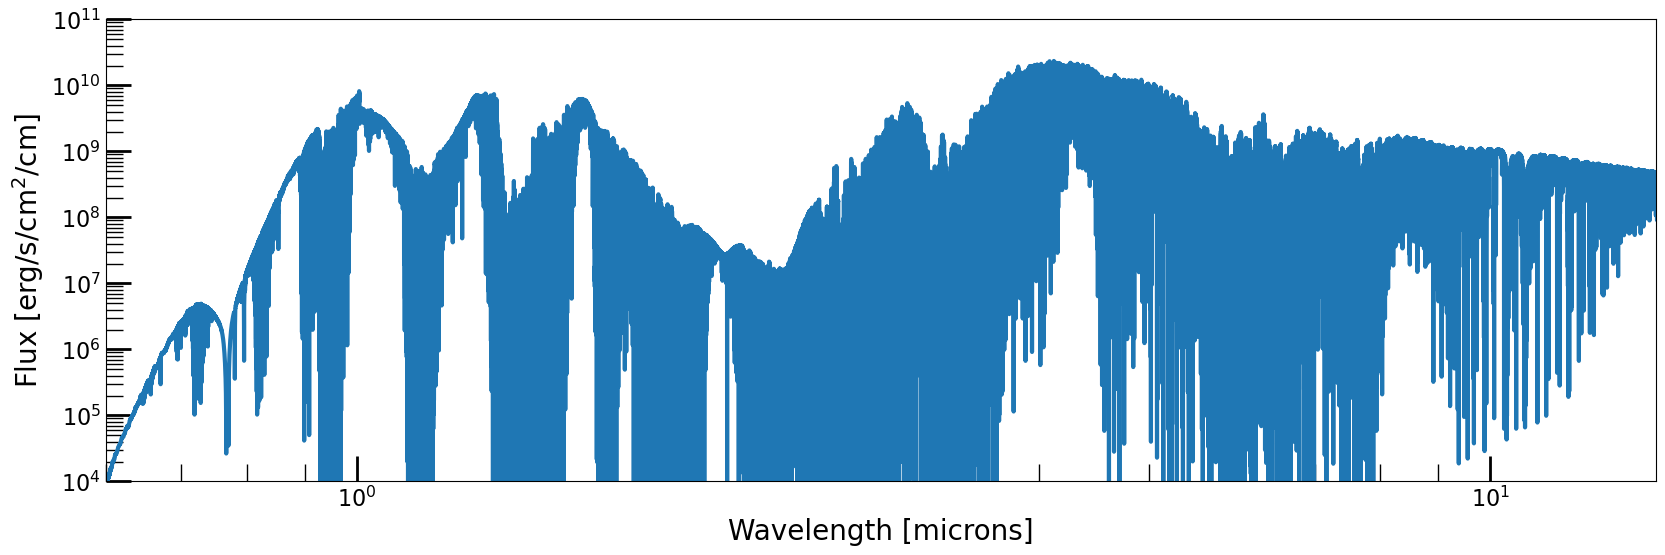

In [20]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(20,6))

ax.set_xlim(0.6,14)
ax.set_ylim(1e4,1e11)
ax.loglog(ds['wavelength'],ds['flux'],linewidth=3)
ax.set_ylabel("Pressure [bars]",fontsize=20)
ax.set_xlabel("Temperature [K]",fontsize=20)

ax.set_ylabel(r"Flux [erg/s/cm$^2$/cm]",fontsize=20)
ax.set_xlabel("Wavelength [microns]",fontsize=20)

ax.minorticks_on()
ax.tick_params(axis='both',which='major',color="k",length =18, width=2,direction='in',labelsize=16)
ax.tick_params(axis='both',which='minor',color="k",length =12, width=1,direction='in',labelsize=16)

plt.show()